In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df=pd.read_csv(r"Desktop\Datasets\covidmaveric.csv")
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,12/31/2019,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,1/1/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,1/2/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,1/3/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,1/6/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,1/7/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,1/8/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,1/9/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
df=df[df["location"] == "India"]
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
18162,IND,Asia,India,12/31/2019,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18163,IND,Asia,India,1/1/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18164,IND,Asia,India,1/2/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18165,IND,Asia,India,1/3/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18166,IND,Asia,India,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18167,IND,Asia,India,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18168,IND,Asia,India,1/6/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18169,IND,Asia,India,1/7/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18170,IND,Asia,India,1/8/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18171,IND,Asia,India,1/9/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [5]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

In [6]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         1
new_cases                           1
new_cases_smoothed                  6
total_deaths                        1
new_deaths                          1
new_deaths_smoothed                 6
total_cases_per_million             1
new_cases_per_million               1
new_cases_smoothed_per_million      6
total_deaths_per_million            1
new_deaths_per_million              1
new_deaths_smoothed_per_million     6
new_tests                          94
total_tests                        88
total_tests_per_thousand           88
new_tests_per_thousand             94
new_tests_smoothed                 83
new_tests_smoothed_per_thousand    83
tests_per_case                     83
positive_rate                      83
tests_units                        76
stringency_index                    8
population  

In [7]:
df['iso_code'].fillna(df['iso_code'].mode())
df['continent'].fillna(df['continent'].mode())
df['location'].fillna(df['location'].mode())


18162    India
18163    India
18164    India
18165    India
18166    India
         ...  
18415    India
18416    India
18417    India
18418    India
18419    India
Name: location, Length: 258, dtype: object

In [8]:
df['total_cases'].fillna(int(np.round(df['total_cases'].mode().median())), inplace=True)
df['new_cases_smoothed'].fillna(df['new_cases_smoothed'].mode().median(), inplace=True)
df['total_deaths'].fillna(df['total_deaths'].mode().median(), inplace=True)
df['new_deaths'].fillna(df['new_deaths'].mode().median(), inplace=True)
df['new_cases'].fillna(df['new_cases'].mode().median(), inplace=True)
df['new_deaths_smoothed'].fillna(df['new_deaths_smoothed'].mode().median(), inplace=True)
df['total_cases_per_million'].fillna(df['total_cases_per_million'].mode().median(), inplace=True)
df['new_cases_per_million'].fillna(df['new_cases_per_million'].mode().median(), inplace=True)
df['new_cases_smoothed_per_million'].fillna(df['new_cases_smoothed_per_million'].mode().median(), inplace=True)
df['total_deaths_per_million'].fillna(df['total_deaths_per_million'].mode().median(), inplace=True)
df['new_deaths_per_million'].fillna(df['new_deaths_per_million'].mode().median(), inplace=True)
df['new_deaths_smoothed_per_million'].fillna(df['new_deaths_smoothed_per_million'].mode().median(), inplace=True)
df['stringency_index'].fillna(df['stringency_index'].mode().median(), inplace=True)
df['new_tests'].fillna(df['new_tests'].mode().median(), inplace=True)
df['total_tests'].fillna(df['total_tests'].mode().median(), inplace=True)
df['total_tests_per_thousand'].fillna(df['total_tests_per_thousand'].mode().median(), inplace=True)
df['new_tests_smoothed'].fillna(df['new_tests_smoothed'].mode().median(), inplace=True)
df['new_tests_smoothed_per_thousand'].fillna(df['new_tests_smoothed_per_thousand'].mode().median(), inplace=True)
df['tests_per_case'].fillna(df['tests_per_case'].mode().median(), inplace=True)
df['positive_rate'].fillna(df['positive_rate'].mode().median(), inplace=True)
df['new_tests_per_thousand'].fillna(df['new_tests_per_thousand'].mode().median(), inplace=True)
df['new_cases_smoothed'].fillna(df['new_cases_smoothed'].mode().median(), inplace=True)

In [9]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
18162,IND,Asia,India,12/31/2019,0.0,0.0,0.000,0.0,0.0,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18163,IND,Asia,India,1/1/2020,0.0,0.0,0.000,0.0,0.0,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18164,IND,Asia,India,1/2/2020,0.0,0.0,0.000,0.0,0.0,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18165,IND,Asia,India,1/3/2020,0.0,0.0,0.000,0.0,0.0,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18166,IND,Asia,India,1/4/2020,0.0,0.0,0.000,0.0,0.0,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,IND,Asia,India,9/9/2020,4370128.0,89706.0,85800.714,73890.0,1115.0,1079.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18416,IND,Asia,India,9/10/2020,4465863.0,95735.0,87493.857,75062.0,1172.0,1098.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18417,IND,Asia,India,9/11/2020,4562414.0,96551.0,89381.000,76271.0,1209.0,1114.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18418,IND,Asia,India,9/12/2020,4659984.0,97570.0,90972.143,77472.0,1201.0,1130.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [10]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  0
total_deaths                        0
new_deaths                          0
new_deaths_smoothed                 0
total_cases_per_million             0
new_cases_per_million               0
new_cases_smoothed_per_million      0
total_deaths_per_million            0
new_deaths_per_million              0
new_deaths_smoothed_per_million     0
new_tests                           0
total_tests                         0
total_tests_per_thousand            0
new_tests_per_thousand              0
new_tests_smoothed                  0
new_tests_smoothed_per_thousand     0
tests_per_case                      0
positive_rate                       0
tests_units                        76
stringency_index                    0
population  

In [11]:
df['tests_units'].mode()

0    samples tested
dtype: object

In [12]:
df["tests_units"].fillna("samples tested", inplace = True) 

In [13]:
df['tests_units'].values

array(['samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested', 'samples tested', 'samples tested',
       'samples tested',

In [14]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
p

1 )


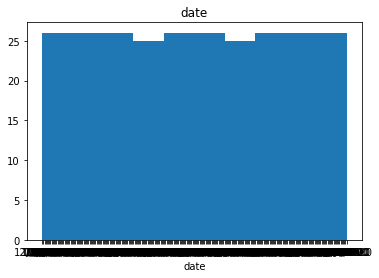

2 )


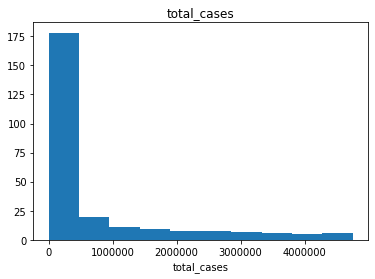

3 )


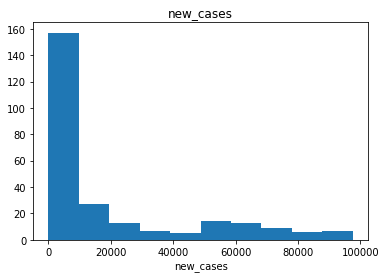

4 )


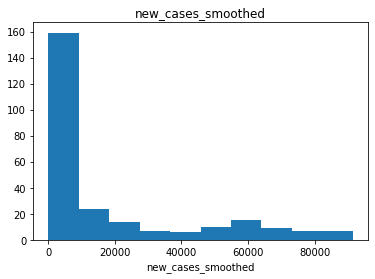

5 )


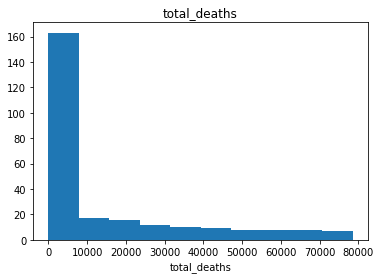

6 )


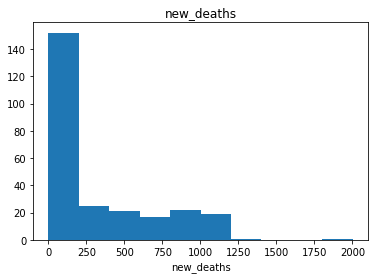

7 )


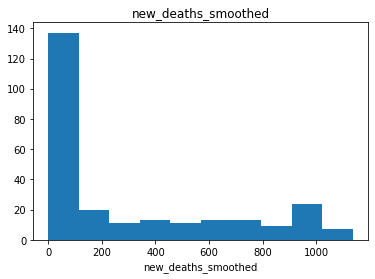

8 )


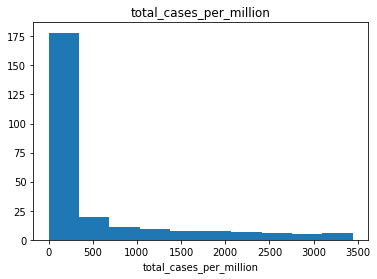

9 )


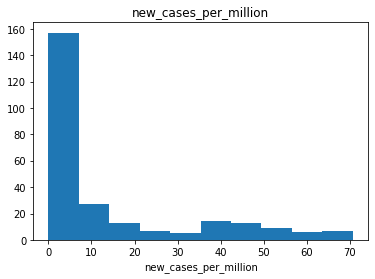

10 )


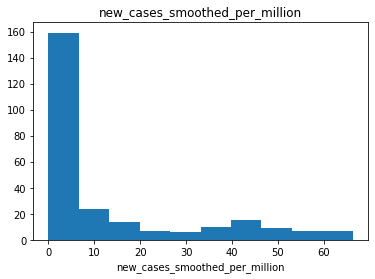

<Figure size 432x288 with 0 Axes>

In [15]:
counter = 0
for col in df.iloc[:,3:14]:
    if counter<10:
        counter += 1
        print(counter,")")
        plt.hist(df[col])
        plt.title(col)
        plt.xlabel(col)
        plt.show()
        plt.clf()

In [16]:
numeric=df._get_numeric_data()
numeric

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
18162,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18163,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18164,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18165,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18166,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,4370128.0,89706.0,85800.714,73890.0,1115.0,1079.571,3166.749,65.004,62.174,53.543,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18416,4465863.0,95735.0,87493.857,75062.0,1172.0,1098.000,3236.122,69.373,63.401,54.393,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18417,4562414.0,96551.0,89381.000,76271.0,1209.0,1114.143,3306.087,69.964,64.769,55.269,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
18418,4659984.0,97570.0,90972.143,77472.0,1201.0,1130.143,3376.789,70.703,65.922,56.139,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [17]:
count = 0
for i in numeric:
    count += 1
    print(str(count)+" ) " +i+" :")
    print("Mean = "+ str(numeric[i].mean()))
    print("Median = "+ str(numeric[i].median()))
    print("Mode = "+ str(numeric[i].mode()[0]))
    print("***************************************")

1 ) total_cases :
Mean = 701868.0658914729
Median = 54647.0
Mode = 0.0
***************************************
2 ) new_cases :
Mean = 18427.736434108527
Median = 3355.0
Mode = 0.0
***************************************
3 ) new_cases_smoothed :
Mean = 17329.889286821708
Median = 2942.9285
Mode = 0.0
***************************************
4 ) total_deaths :
Mean = 14352.709302325582
Median = 1834.5
Mode = 0.0
***************************************
5 ) new_deaths :
Mean = 304.5968992248062
Median = 96.0
Mode = 0.0
***************************************
6 ) new_deaths_smoothed :
Mean = 291.08417441860456
Median = 102.143
Mode = 0.0
***************************************
7 ) total_cases_per_million :
Mean = 508.59837209302316
Median = 39.599000000000004
Mode = 0.0
***************************************
8 ) new_cases_per_million :
Mean = 13.353379844961243
Median = 2.4314999999999998
Mode = 0.0
***************************************
9 ) new_cases_smoothed_per_million :
Mean = 12.55784

1 )new_cases vs Total_cases


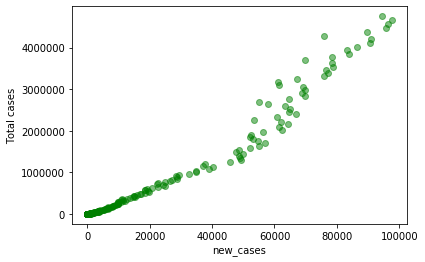

2 )new_cases_smoothed vs Total_cases


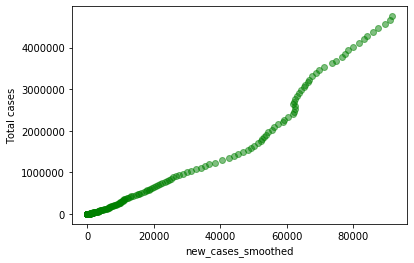

3 )total_deaths vs Total_cases


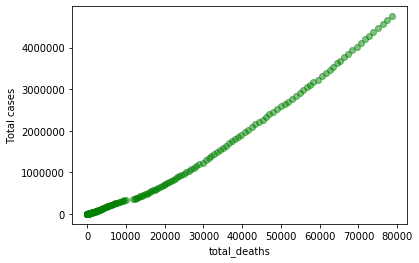

4 )new_deaths vs Total_cases


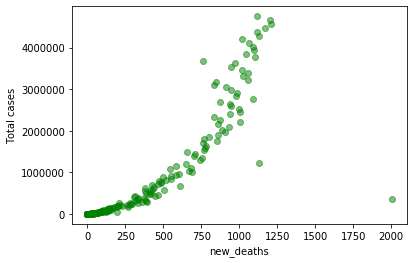

5 )new_deaths_smoothed vs Total_cases


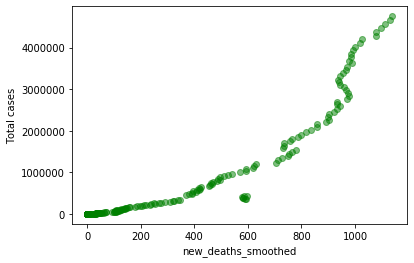

6 )total_cases_per_million vs Total_cases


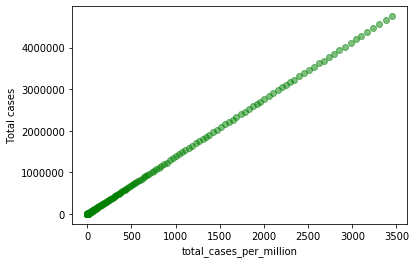

7 )new_cases_per_million vs Total_cases


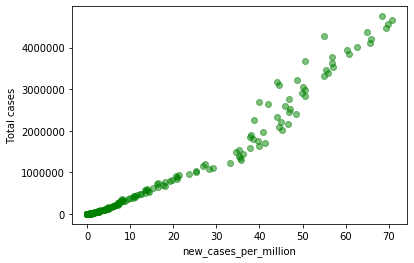

8 )new_cases_smoothed_per_million vs Total_cases


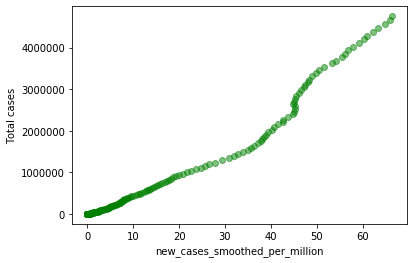

9 )total_deaths_per_million vs Total_cases


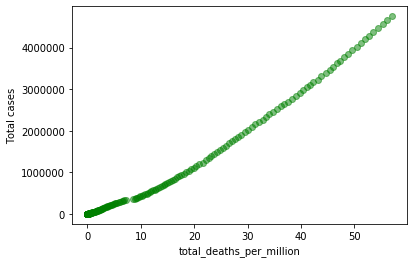

10 )new_deaths_per_million vs Total_cases


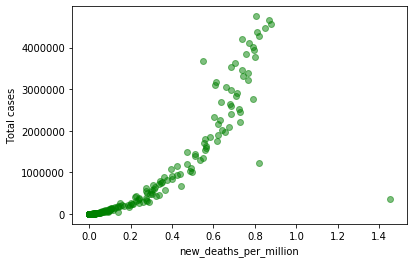

<Figure size 432x288 with 0 Axes>

In [18]:
counter = 0
for col in df.iloc[:,5:16]:
    if counter<10:
        counter += 1
        print(counter,")"+ col + " vs Total_cases")
        plt.scatter(df[col],df['total_cases'], color='green',alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Total cases")
        plt.show()
        plt.clf()

1 )new_cases vs Total_cases


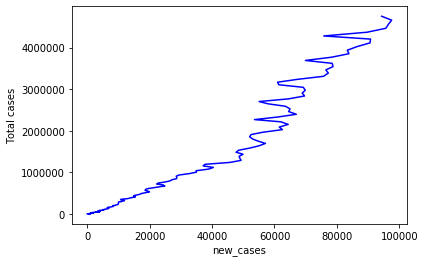

2 )new_cases_smoothed vs Total_cases


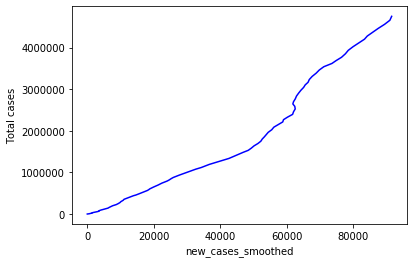

3 )total_deaths vs Total_cases


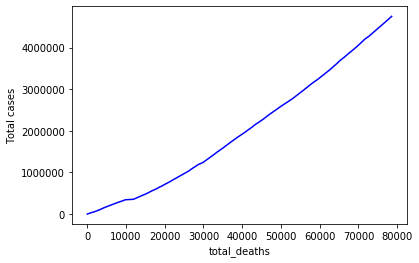

4 )new_deaths vs Total_cases


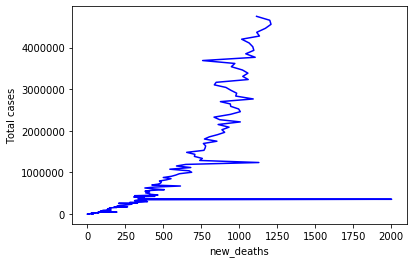

5 )new_deaths_smoothed vs Total_cases


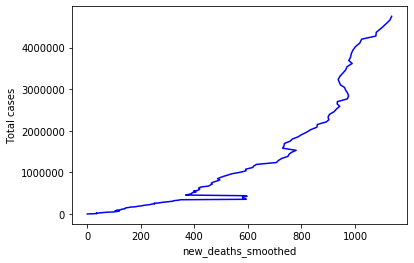

6 )total_cases_per_million vs Total_cases


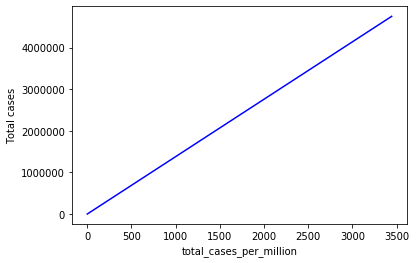

7 )new_cases_per_million vs Total_cases


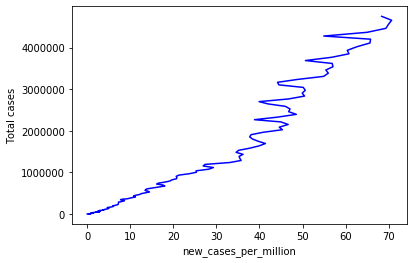

8 )new_cases_smoothed_per_million vs Total_cases


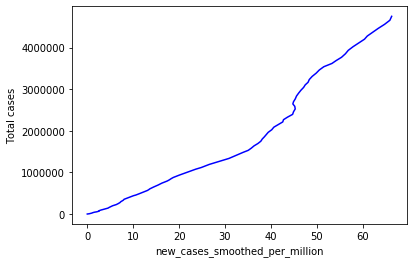

9 )total_deaths_per_million vs Total_cases


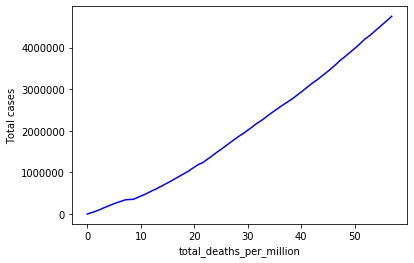

10 )new_deaths_per_million vs Total_cases


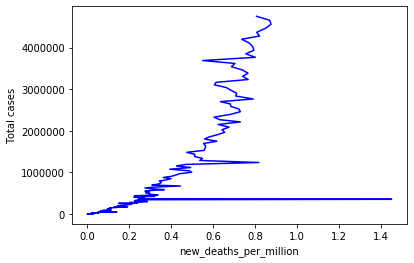

<Figure size 432x288 with 0 Axes>

In [19]:
counter = 0
for col in df.iloc[:,5:16]:
    if counter<10:
        counter += 1
        print(counter,")"+ col + " vs Total_cases")
        plt.plot(df[col],df['total_cases'],color='blue')
        plt.xlabel(col)
        plt.ylabel("Total cases")
        plt.show()
        plt.clf()

In [20]:
import datetime as dt

df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)

In [21]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [22]:
delete_col_list = ['iso_code', 'continent', 'location','population', 'population_density', 'median_age', 
                   'aged_65_older','aged_70_older', 'gdp_per_capita', 'extreme_poverty','cardiovasc_death_rate',
                   'diabetes_prevalence', 'female_smokers','male_smokers', 'handwashing_facilities',
                   'hospital_beds_per_thousand','life_expectancy']

In [23]:
df1 = df.copy()
df1 = df1.drop(delete_col_list, axis=1)

In [24]:
df1

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,human_development_index
18162,737424,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,10.19,0.64
18163,737425,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,0.00,0.64
18164,737426,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,0.00,0.64
18165,737427,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,0.00,0.64
18166,737428,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,0.00,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,737677,4370128.0,89706.0,85800.714,73890.0,1115.0,1079.571,3166.749,65.004,62.174,...,52934433.0,38.358,0.8190,1060722.0,0.769,12.363,0.081,samples tested,10.19,0.64
18416,737678,4465863.0,95735.0,87493.857,75062.0,1172.0,1098.000,3236.122,69.373,63.401,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,10.19,0.64
18417,737679,4562414.0,96551.0,89381.000,76271.0,1209.0,1114.143,3306.087,69.964,64.769,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,10.19,0.64
18418,737680,4659984.0,97570.0,90972.143,77472.0,1201.0,1130.143,3376.789,70.703,65.922,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,samples tested,10.19,0.64


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 18162 to 18419
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             258 non-null    int64  
 1   total_cases                      258 non-null    float64
 2   new_cases                        258 non-null    float64
 3   new_cases_smoothed               258 non-null    float64
 4   total_deaths                     258 non-null    float64
 5   new_deaths                       258 non-null    float64
 6   new_deaths_smoothed              258 non-null    float64
 7   total_cases_per_million          258 non-null    float64
 8   new_cases_per_million            258 non-null    float64
 9   new_cases_smoothed_per_million   258 non-null    float64
 10  total_deaths_per_million         258 non-null    float64
 11  new_deaths_per_million           258 non-null    float64
 12  new_deaths_smoot

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
le.fit(df1['tests_units'])
df1['tests_units']=le.transform(df1['tests_units'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 18162 to 18419
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             258 non-null    int64  
 1   total_cases                      258 non-null    float64
 2   new_cases                        258 non-null    float64
 3   new_cases_smoothed               258 non-null    float64
 4   total_deaths                     258 non-null    float64
 5   new_deaths                       258 non-null    float64
 6   new_deaths_smoothed              258 non-null    float64
 7   total_cases_per_million          258 non-null    float64
 8   new_cases_per_million            258 non-null    float64
 9   new_cases_smoothed_per_million   258 non-null    float64
 10  total_deaths_per_million         258 non-null    float64
 11  new_deaths_per_million           258 non-null    float64
 12  new_deaths_smoot

In [28]:
x = df1.drop(['total_cases'],axis=1).values
y = df1['total_cases'].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = linear_reg.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))

[[8.49552660e+05 8.49553000e+05]
 [1.72650886e+04 1.72650000e+04]
 [2.32963803e+06 2.32963800e+06]
 [2.45063749e+04 2.45060000e+04]
 [3.50423117e+04 3.50430000e+04]
 [1.90534646e+05 1.90535000e+05]
 [2.56582089e-02 0.00000000e+00]
 [3.04493978e+06 3.04494000e+06]
 [5.28859159e+05 5.28859000e+05]
 [1.25101640e+05 1.25101000e+05]
 [7.42417580e+05 7.42417000e+05]
 [2.46627793e+05 2.46628000e+05]
 [9.61684468e+04 9.61690000e+04]
 [2.90325195e+00 3.00000000e+00]
 [2.21507418e+06 2.21507400e+06]
 [5.48318301e+05 5.48318000e+05]
 [2.70274187e+06 2.70274200e+06]
 [6.41137385e+03 6.41200000e+03]
 [2.97570087e+06 2.97570100e+06]
 [2.26867509e+06 2.26867500e+06]
 [2.21500391e-02 0.00000000e+00]
 [2.94384035e+00 3.00000000e+00]
 [2.89472597e+00 3.00000000e+00]
 [1.33876050e+04 1.33870000e+04]
 [1.65799304e+05 1.65799000e+05]
 [4.64329991e+04 4.64330000e+04]
 [3.37402575e+03 3.37400000e+03]
 [2.83692470e+06 2.83692500e+06]
 [3.80532065e+05 3.80532000e+05]
 [4.97722634e+01 5.00000000e+01]
 [9.783802

In [32]:
from sklearn.metrics import mean_squared_error
LR_err = mean_squared_error(y_test,y_pred)

In [33]:
print("Accuracy is:"+str(np.round((100-LR_err),2))+ " %")

Accuracy is:99.86 %


In [34]:
from sklearn.ensemble import RandomForestClassifier
for_reg=RandomForestClassifier(n_estimators=10)
for_reg.fit(x_train,y_train)
y_predf=for_reg.predict(x_test)

In [35]:
print(np.concatenate((y_predf.reshape(len(y_predf),1), y_test.reshape(len(y_test),1)), axis=1))

[[8.209160e+05 8.495530e+05]
 [1.437800e+04 1.726500e+04]
 [2.396637e+06 2.329638e+06]
 [2.307700e+04 2.450600e+04]
 [3.733600e+04 3.504300e+04]
 [1.821430e+05 1.905350e+05]
 [0.000000e+00 0.000000e+00]
 [2.905823e+06 3.044940e+06]
 [5.668400e+05 5.288590e+05]
 [1.184470e+05 1.251010e+05]
 [7.196650e+05 7.424170e+05]
 [2.169190e+05 2.466280e+05]
 [1.011390e+05 9.616900e+04]
 [3.000000e+00 3.000000e+00]
 [2.153010e+06 2.215074e+06]
 [5.668400e+05 5.483180e+05]
 [2.647663e+06 2.702742e+06]
 [5.194000e+03 6.412000e+03]
 [2.905823e+06 2.975701e+06]
 [2.153010e+06 2.268675e+06]
 [0.000000e+00 0.000000e+00]
 [3.000000e+00 3.000000e+00]
 [3.000000e+00 3.000000e+00]
 [1.036300e+04 1.338700e+04]
 [1.737630e+05 1.657990e+05]
 [4.939100e+04 4.643300e+04]
 [2.902000e+03 3.374000e+03]
 [2.767273e+06 2.836925e+06]
 [3.950480e+05 3.805320e+05]
 [4.400000e+01 5.000000e+01]
 [8.730000e+02 9.790000e+02]
 [5.854930e+05 6.046410e+05]
 [2.169190e+05 2.267700e+05]
 [9.361810e+05 9.688760e+05]
 [7.800300e+04

In [36]:
for_reg.score(x_test,y_predf)

1.0

In [37]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score
accuracy = explained_variance_score(y_test,y_predf)

In [38]:
print("Accuracy is:"+ str(np.round((100*accuracy),2))+ " %")

Accuracy is:99.6 %


In [39]:
df1

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,human_development_index
18162,737424,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,10.19,0.64
18163,737425,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,0.00,0.64
18164,737426,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,0.00,0.64
18165,737427,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,0.00,0.64
18166,737428,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,0.00,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,737677,4370128.0,89706.0,85800.714,73890.0,1115.0,1079.571,3166.749,65.004,62.174,...,52934433.0,38.358,0.8190,1060722.0,0.769,12.363,0.081,0,10.19,0.64
18416,737678,4465863.0,95735.0,87493.857,75062.0,1172.0,1098.000,3236.122,69.373,63.401,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,10.19,0.64
18417,737679,4562414.0,96551.0,89381.000,76271.0,1209.0,1114.143,3306.087,69.964,64.769,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,10.19,0.64
18418,737680,4659984.0,97570.0,90972.143,77472.0,1201.0,1130.143,3376.789,70.703,65.922,...,6166962.0,0.010,0.0645,1125.0,0.001,10.889,0.075,0,10.19,0.64


In [47]:
test_date = input()
from datetime import datetime as dt
temp=test_date
d = dt.strptime(temp, '%Y-%m-%d').date()
d=d.toordinal()
col = df1.columns
df2 = df1[col].copy()
value = [{'date':d}]
df2=df2.append(value, ignore_index=True)
temp_data= df2.ffill(axis=0)  
temp_x = temp_data.drop(['total_cases'],axis=1).values
temp_x=temp_x[-1]
result = for_reg.predict([temp_x])
print("The Total test cases that on",temp ,"will be --> ",(result))


2020-10-20
The Total test cases that on 2020-10-20 will be -->  [4465863.]
